In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/120-years-of-olympic-history-athletes-and-results/noc_regions.csv
/kaggle/input/120-years-of-olympic-history-athletes-and-results/athlete_events.csv


## Cargar los datasets

In [2]:
atletas = pd.read_csv('/kaggle/input/120-years-of-olympic-history-athletes-and-results/athlete_events.csv')
regiones = pd.read_csv('/kaggle/input/120-years-of-olympic-history-athletes-and-results/noc_regions.csv')

In [3]:
atletas.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [4]:
regiones.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


## Combinar los dataframes

In [5]:
atletas_df = atletas.merge(regiones, how='left', on= 'NOC')
atletas_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [6]:
atletas_df.shape

(271116, 17)

## Hacer consistentes los nombres de las columnas

In [7]:
atletas_df.rename(columns={'region':'Region', 'notes':'Notes'}, inplace=True)

In [8]:
atletas_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


## Resumen de información de las columnas

In [9]:
atletas_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271116 entries, 0 to 271115
Data columns (total 17 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
 15  Region  270746 non-null  object 
 16  Notes   5039 non-null    object 
dtypes: float64(3), int64(2), object(12)
memory usage: 37.2+ MB


## Resumen estadístico de las variables numéricas 

In [10]:
atletas_df.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


## Resumen estadístico de las variables categoricas

In [11]:
atletas_df.describe(exclude=np.number)

,Name,Sex,Team,NOC,Games,Season,City,Sport,Event,Medal,Region,Notes
count,271116,271116,271116,271116,271116,271116,271116,271116,271116,39783,270746,5039
unique,134732,2,1184,230,51,2,42,66,765,3,205,21
top,Robert Tait McKenzie,M,United States,USA,2000 Summer,Summer,London,Athletics,Football Men's Football,Gold,USA,Yugoslavia
freq,58,196594,17847,18853,13821,222552,22426,38624,5733,13372,18853,2583


## Valores faltantes

In [12]:
columnas_nan = atletas_df.isna().any()
columnas_nan

ID        False
Name      False
Sex       False
Age        True
Height     True
Weight     True
Team      False
NOC       False
Games     False
Year      False
Season    False
City      False
Sport     False
Event     False
Medal      True
Region     True
Notes      True
dtype: bool

In [13]:
atletas_df.isna().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
Region       370
Notes     266077
dtype: int64

## Colombia

In [14]:
atletas_df.query('Team == "Colombia"')

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
1026,574,rika Abril Surez,F,34.0,164.0,52.0,Colombia,COL,2012 Summer,2012,Summer,London,Athletics,Athletics Women's Marathon,NaN,Colombia,NaN
1027,574,rika Abril Surez,F,38.0,164.0,52.0,Colombia,COL,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Women's Marathon,NaN,Colombia,NaN
1028,575,Laura Valentina Abril Restrepo,F,22.0,162.0,50.0,Colombia,COL,2012 Summer,2012,Summer,London,Cycling,"Cycling Women's Mountainbike, Cross-Country",NaN,Colombia,NaN
1163,647,Eyne Acevedo Tabares,M,22.0,NaN,67.0,Colombia,COL,1992 Summer,1992,Summer,Barcelona,Weightlifting,Weightlifting Men's Lightweight,NaN,Colombia,NaN
1164,648,Fabio Acevedo,M,22.0,171.0,70.0,Colombia,COL,1972 Summer,1972,Summer,Munich,Cycling,"Cycling Men's Road Race, Individual",NaN,Colombia,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270775,135417,Fabiola Zuluaga Amado,F,21.0,171.0,65.0,Colombia,COL,2000 Summer,2000,Summer,Sydney,Tennis,Tennis Women's Singles,NaN,Colombia,NaN
270776,135417,Fabiola Zuluaga Amado,F,21.0,171.0,65.0,Colombia,COL,2000 Summer,2000,Summer,Sydney,Tennis,Tennis Women's Doubles,NaN,Colombia,NaN
270777,135417,Fabiola Zuluaga Amado,F,25.0,171.0,65.0,Colombia,COL,2004 Summer,2004,Summer,Athina,Tennis,Tennis Women's Singles,NaN,Colombia,NaN
270778,135417,Fabiola Zuluaga Amado,F,25.0,171.0,65.0,Colombia,COL,2004 Summer,2004,Summer,Athina,Tennis,Tennis Women's Doubles,NaN,Colombia,NaN


## Top de paises con más participaciones

In [15]:
top_10_paises = (
    atletas_df.Team.value_counts()
    .sort_values(ascending=False).head(10)
)
top_10_paises

United States    17847
France           11988
Great Britain    11404
Italy            10260
Germany           9326
Canada            9279
Japan             8289
Sweden            8052
Australia         7513
Hungary           6547
Name: Team, dtype: int64

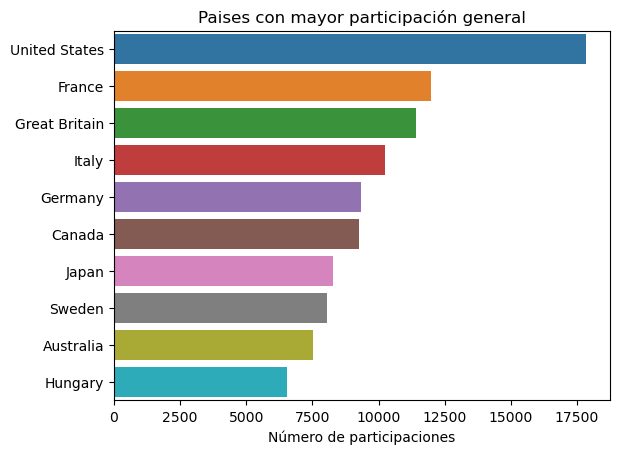

In [16]:

sns.barplot(y=top_10_paises.index, x=top_10_paises)
plt.title('Paises con mayor participación general')
plt.xlabel('Número de participaciones')
plt.show()

## Distribución de edades de los participantes

In [17]:
rango_edad = np.arange(atletas_df.Age.min(), atletas_df.Age.max())
eje_x = np.arange(atletas_df.Age.min(), atletas_df.Age.max(), 10)

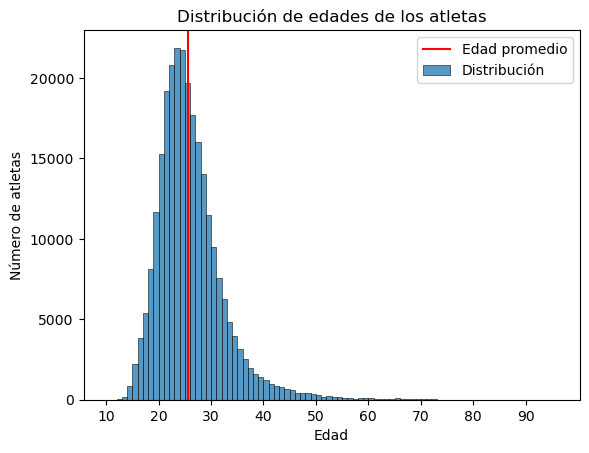

In [18]:
sns.histplot(atletas_df.Age, bins = rango_edad, label='Distribución')
plt.axvline(x=atletas_df.Age.mean(),
            color='red', label='Edad promedio')
plt.title('Distribución de edades de los atletas')
plt.ylabel('Número de atletas')
plt.xlabel('Edad')
plt.xticks(eje_x)
plt.legend()
plt.show()

### Distribución de edades para Colombia

In [19]:
atletas_co_df = atletas_df.query('Team == "Colombia"')
atletas_co_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
1026,574,rika Abril Surez,F,34.0,164.0,52.0,Colombia,COL,2012 Summer,2012,Summer,London,Athletics,Athletics Women's Marathon,NaN,Colombia,NaN
1027,574,rika Abril Surez,F,38.0,164.0,52.0,Colombia,COL,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Women's Marathon,NaN,Colombia,NaN
1028,575,Laura Valentina Abril Restrepo,F,22.0,162.0,50.0,Colombia,COL,2012 Summer,2012,Summer,London,Cycling,"Cycling Women's Mountainbike, Cross-Country",NaN,Colombia,NaN
1163,647,Eyne Acevedo Tabares,M,22.0,NaN,67.0,Colombia,COL,1992 Summer,1992,Summer,Barcelona,Weightlifting,Weightlifting Men's Lightweight,NaN,Colombia,NaN
1164,648,Fabio Acevedo,M,22.0,171.0,70.0,Colombia,COL,1972 Summer,1972,Summer,Munich,Cycling,"Cycling Men's Road Race, Individual",NaN,Colombia,NaN


In [20]:
rango_edad = np.arange(atletas_co_df.Age.min(), atletas_co_df.Age.max())
eje_x = np.arange(atletas_co_df.Age.min(), atletas_co_df.Age.max(), 10)

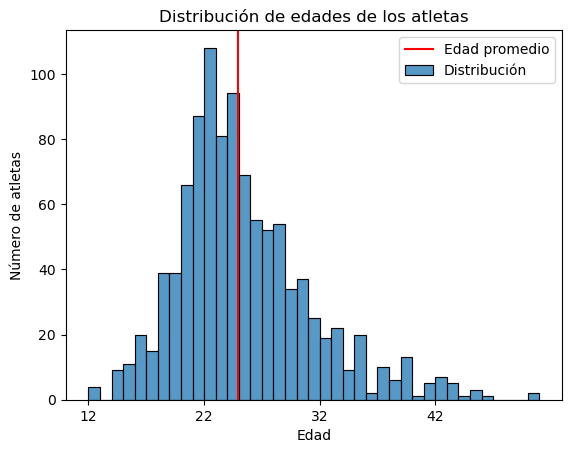

In [21]:
sns.histplot(atletas_co_df.Age, bins = rango_edad, label='Distribución')
plt.axvline(x=atletas_co_df.Age.mean(),
            color='red', label='Edad promedio')
plt.title('Distribución de edades de los atletas')
plt.ylabel('Número de atletas')
plt.xlabel('Edad')
plt.xticks(eje_x)
plt.legend()
plt.show()

### Gráficar la distribución de edades para un pais o para todos los paises

In [22]:
def distribucion_edades(df, pais='' ):
    t_pais = '(Todos los paises)'
    if pais:
        df = atletas_df.query(f'Team == "{pais}"')
        t_pais = f'( {pais} )'
    
    rango_edad = np.arange(df.Age.min(), df.Age.max())
    eje_x = np.arange(df.Age.min(), df.Age.max(), 10)
    
    sns.histplot(df.Age, bins = rango_edad, label='Distribución')
    plt.axvline(x=df.Age.mean(), label='Edad promedio', color='red')
    plt.title(f'Distribución de edades de los atletas {t_pais}')
    plt.ylabel('Número de atletas')
    plt.xlabel('Edad')
    plt.xticks(eje_x)
    plt.legend()
    plt.show()

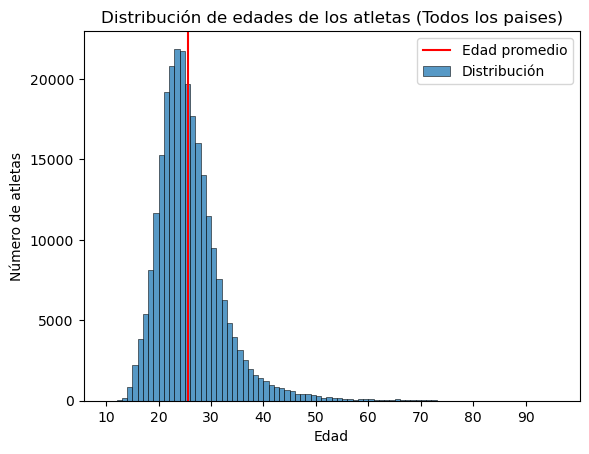

In [23]:
distribucion_edades(df = atletas_df )


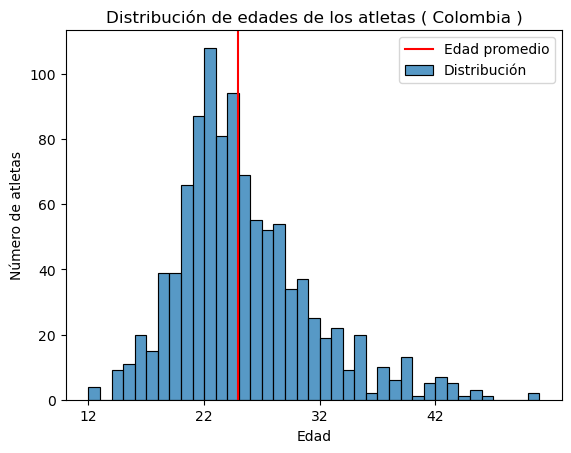

In [24]:
distribucion_edades(df = atletas_df, pais='Colombia' )

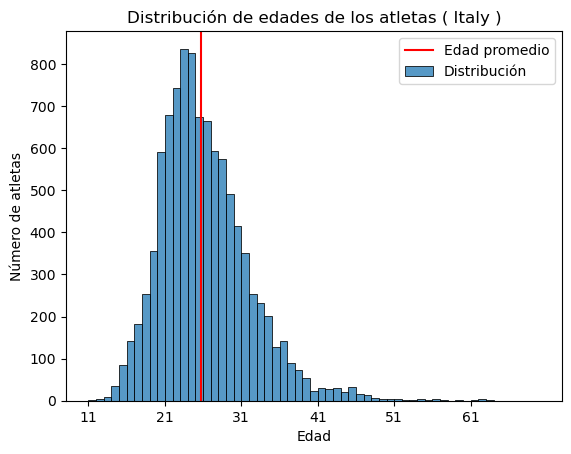

In [25]:
distribucion_edades(df = atletas_df, pais='Italy' )

## ¿Cuáles son los deportes de invierno?

In [26]:
atletas_df.query('Season == "Winter"').Sport.unique()

array(['Speed Skating', 'Cross Country Skiing', 'Ice Hockey', 'Biathlon',
       'Alpine Skiing', 'Luge', 'Bobsleigh', 'Figure Skating',
       'Nordic Combined', 'Freestyle Skiing', 'Ski Jumping', 'Curling',
       'Snowboarding', 'Short Track Speed Skating', 'Skeleton',
       'Military Ski Patrol', 'Alpinism'], dtype=object)

### ¿Colombia ha participado en alguna temporada de invierno? ¿Cuántas participaciones ha tenido? ¿En qué deporte?

In [27]:
atletas_df.query('Season == "Winter" & Team == "Colombia"').groupby(['Team', 'Season', 'Sport'])['Sport'].count()

Team      Season  Sport        
Colombia  Winter  Alpine Skiing    2
Name: Sport, dtype: int64

## ¿Cuáles son los deportes de verano?

In [28]:
atletas_df.query('Season == "Summer"').Sport.unique()


array(['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Athletics',
       'Swimming', 'Badminton', 'Sailing', 'Gymnastics',
       'Art Competitions', 'Handball', 'Weightlifting', 'Wrestling',
       'Water Polo', 'Hockey', 'Rowing', 'Fencing', 'Equestrianism',
       'Shooting', 'Boxing', 'Taekwondo', 'Cycling', 'Diving', 'Canoeing',
       'Tennis', 'Modern Pentathlon', 'Golf', 'Softball', 'Archery',
       'Volleyball', 'Synchronized Swimming', 'Table Tennis', 'Baseball',
       'Rhythmic Gymnastics', 'Rugby Sevens', 'Trampolining',
       'Beach Volleyball', 'Triathlon', 'Rugby', 'Lacrosse', 'Polo',
       'Cricket', 'Ice Hockey', 'Racquets', 'Motorboating', 'Croquet',
       'Figure Skating', 'Jeu De Paume', 'Roque', 'Basque Pelota',
       'Alpinism', 'Aeronautics'], dtype=object)

## ¿Cuántas participaciones por deporte ha tenido Colombia?

In [29]:
(
    atletas_df
    .query('Season == "Summer" & Team == "Colombia"')
    .groupby(['Team', 'Season', 'Sport'])['Sport']
    .count()
    .sort_values(ascending=False)
)

Team      Season  Sport                
Colombia  Summer  Athletics                208
                  Cycling                  193
                  Swimming                 123
                  Football                 120
                  Weightlifting             65
                  Shooting                  63
                  Fencing                   62
                  Boxing                    47
                  Gymnastics                37
                  Diving                    24
                  Wrestling                 23
                  Equestrianism             19
                  Archery                   17
                  Tennis                    15
                  Rugby Sevens              12
                  Judo                      12
                  Taekwondo                  9
                  Sailing                    6
                  Table Tennis               3
                  Triathlon                  3
                  Sy

## Participaciones femeninas y masculinas

In [30]:
f_m_conteo = atletas_df.Sex.value_counts()
f_m_conteo

M    196594
F     74522
Name: Sex, dtype: int64

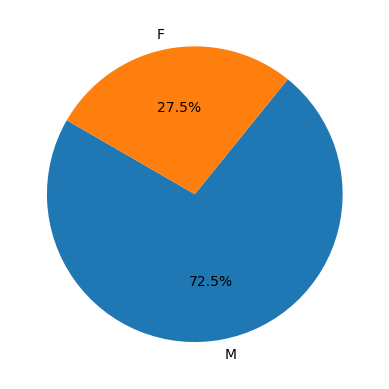

In [31]:
plt.pie(f_m_conteo, labels=f_m_conteo.index, autopct='%1.1f%%', startangle=150)
plt.show()

### Participaciones femeninas y masculinas por Colombia

In [32]:
f_m_conteo_co = atletas_df.query('Team == "Colombia"').Sex.value_counts()
f_m_conteo_co

M    773
F    295
Name: Sex, dtype: int64

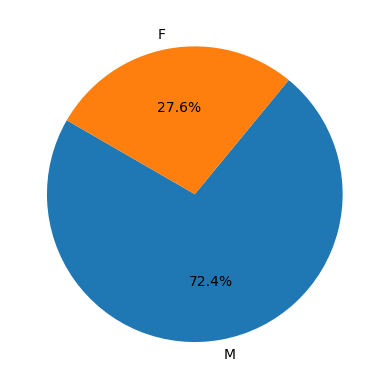

In [33]:
plt.pie(f_m_conteo_co, labels=f_m_conteo_co.index, autopct='%1.1f%%', startangle=150)
plt.show()

## Número total de medallas

In [34]:
atletas_df.Medal.value_counts()

Gold      13372
Bronze    13295
Silver    13116
Name: Medal, dtype: int64

## Número total de participantes femeninas por cada olimpiada

In [35]:
años_f = (
    atletas_df
    .query('Sex == "F" & Season == "Summer"')
    .groupby('Year')['Sex'].count().reset_index(name='Conteo')
)
años_f

,Year,Conteo
0,1900,33
1,1904,16
2,1906,11
3,1908,47
4,1912,87
5,1920,134
6,1924,244
7,1928,404
8,1932,347
9,1936,468


In [36]:
f_olimp = atletas_df.query('Sex == "F" & Season == "Summer"')

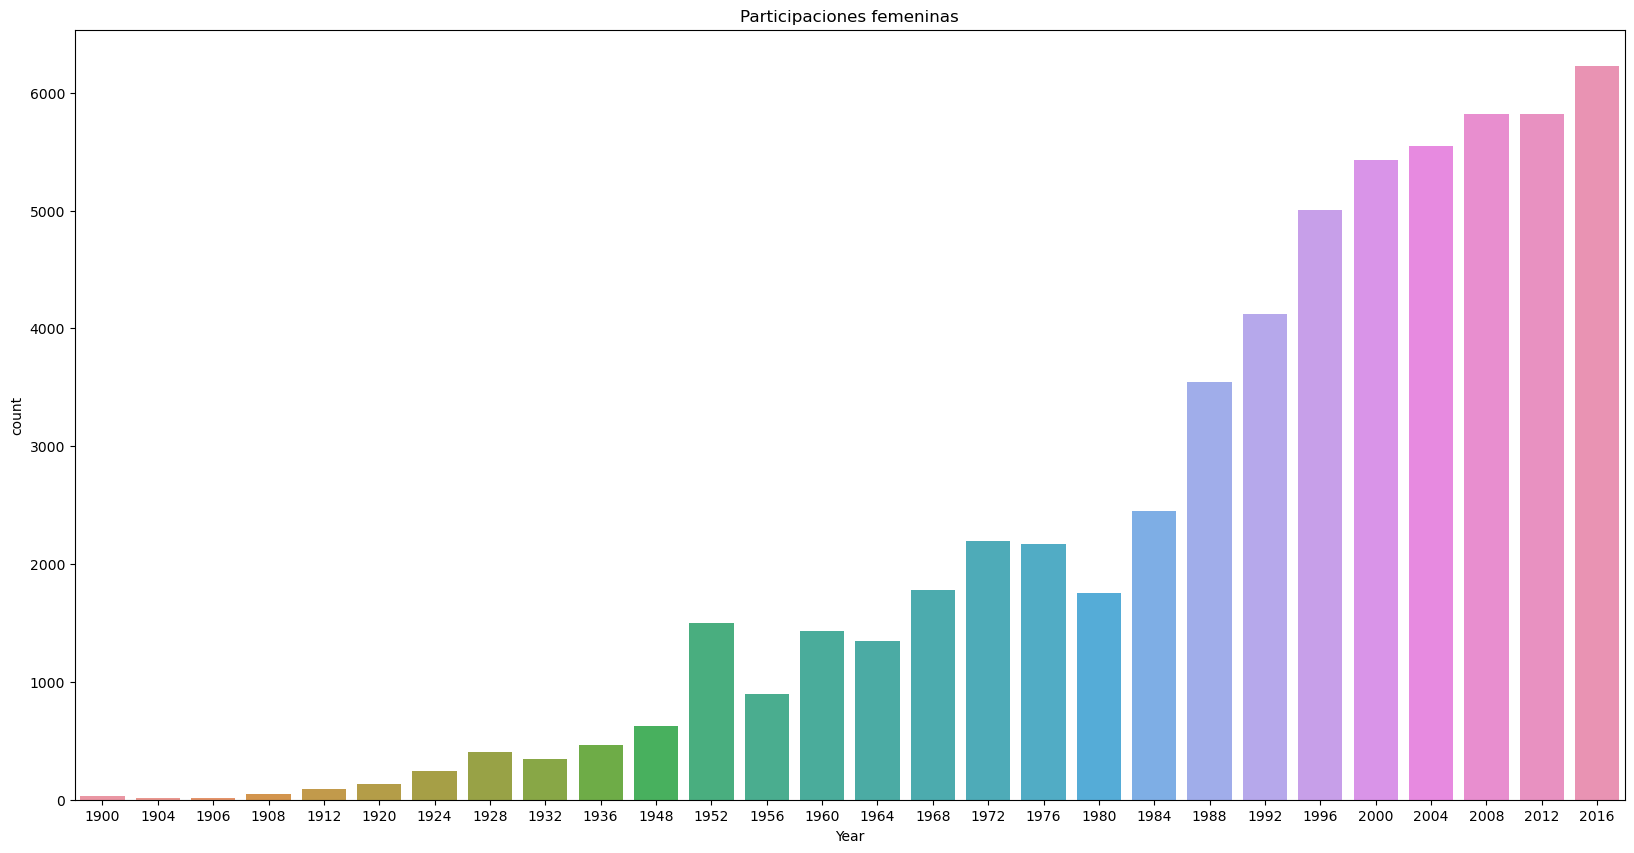

In [37]:
plt.figure(figsize=(20, 10))
plt.title('Participaciones femeninas')
sns.countplot(data=f_olimp, x='Year')
plt.show()

## Atletas con medallas de oro

In [38]:
medallas_oro = atletas_df.query('Medal == "Gold"')
medallas_oro

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold,Finland,NaN
44,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold,Finland,NaN
48,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold,Finland,NaN
60,20,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,1992 Winter,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Super G,Gold,Norway,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270981,135503,Zurab Zviadauri,M,23.0,182.0,90.0,Georgia,GEO,2004 Summer,2004,Summer,Athina,Judo,Judo Men's Middleweight,Gold,Georgia,NaN
271009,135520,Julia Zwehl,F,28.0,167.0,60.0,Germany,GER,2004 Summer,2004,Summer,Athina,Hockey,Hockey Women's Hockey,Gold,Germany,NaN
271016,135523,"Ronald Ferdinand ""Ron"" Zwerver",M,29.0,200.0,93.0,Netherlands,NED,1996 Summer,1996,Summer,Atlanta,Volleyball,Volleyball Men's Volleyball,Gold,Netherlands,NaN
271049,135545,Henk Jan Zwolle,M,31.0,197.0,93.0,Netherlands,NED,1996 Summer,1996,Summer,Atlanta,Rowing,Rowing Men's Coxed Eights,Gold,Netherlands,NaN


### Solo filas sin edad NaN

In [39]:
medallas_oro = medallas_oro[medallas_oro['Age'].notna()]

In [40]:
# #Alternativa
# medallas_oro[np.isfinite(medallas_oro['Age'])]

### Ganadores de medallas de oro mayores a 55 años

In [41]:
(
    medallas_oro.query('Age > 55')['Name']
    .value_counts().reset_index(name='n_golds')
    .rename(columns={'index':'Name'})
)

,Name,n_golds
0,Oscar Gomer Swahn,3
1,Walter Winans,2
2,Johan August Anker,1
3,"Nikolaus ""Klaus"" Balkenhol",1
4,"Robert W. Williams, Jr.",1
5,Allen Whitty,1
6,Chrtien Andr Waydelich,1
7,David August Wallin,1
8,"William Henry ""Will"" Thompson",1
9,Giani Stparich,1


### ¿En qué deportes?

In [42]:
sport_gold_mas_55 = medallas_oro.query('Age > 55')[['Sport']]

<AxesSubplot:xlabel='Sport', ylabel='count'>

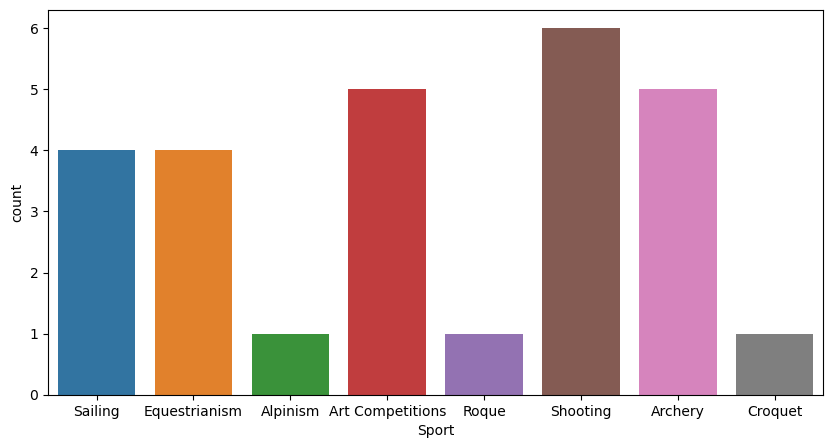

In [43]:
plt.figure(figsize=(10,5))
sns.countplot(sport_gold_mas_55, x = 'Sport')

## Medallas de oro por pais

In [44]:
(
    atletas_df.query('Medal == "Gold"').groupby('Region')['Medal']
    .count().reset_index(name='n_oros')
    .sort_values('n_oros', ascending=False)
    .head(10)
)

,Region,n_oros
90,USA,2638
72,Russia,1599
32,Germany,1301
89,UK,678
43,Italy,575
30,France,501
80,Sweden,479
14,Canada,463
36,Hungary,432
64,Norway,378


## Medallas de oro por pais en las olimpiadas más recientes

In [45]:
ultimo_año = atletas_df.Year.max()

In [46]:
oros_ultimo_año = (
    atletas_df.query(f'Year == {ultimo_año} & Medal == "Gold"')
    .Team
    .value_counts()
    .head(20)
)
oros_ultimo_año

United States    137
Great Britain     64
Russia            50
Germany           47
China             44
Brazil            34
Australia         23
Argentina         21
France            20
Japan             17
Denmark           15
Serbia            14
Fiji              13
South Korea       13
Hungary           12
Jamaica           11
Netherlands        9
Italy              8
Croatia            7
Spain              7
Name: Team, dtype: int64

<AxesSubplot:xlabel='Team'>

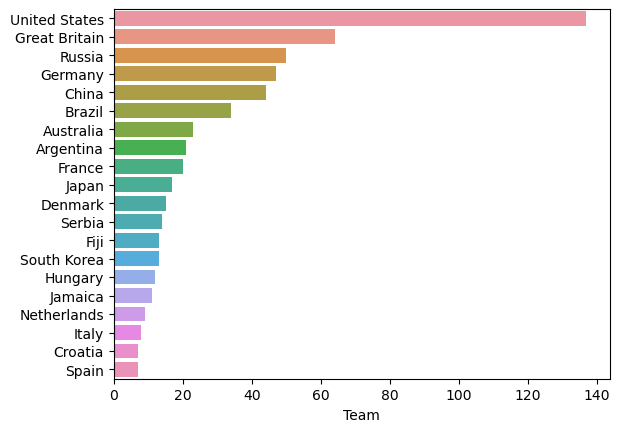

In [47]:
sns.barplot(x= oros_ultimo_año, y=oros_ultimo_año.index)

## Estatura vs peso

In [48]:
medallas_notna = (
    atletas_df[atletas_df['Height'].notna() & atletas_df['Weight'].notna()]
)


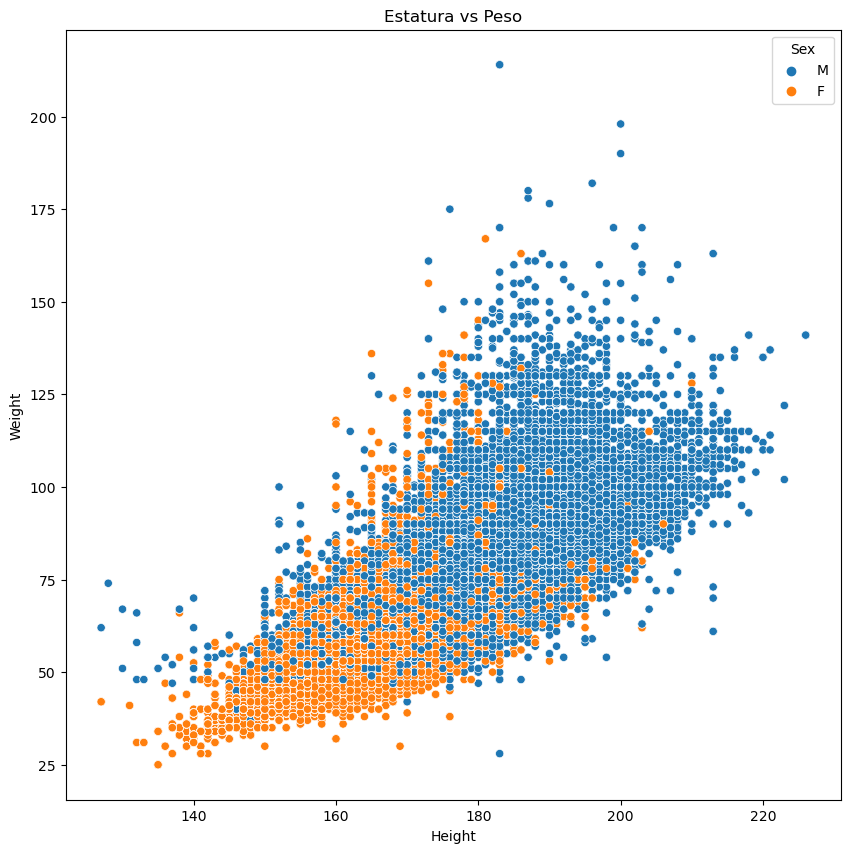

In [49]:
plt.figure(figsize=(10, 10))
sns.scatterplot(data=medallas_notna, x='Height', y='Weight', hue='Sex')
plt.title('Estatura vs Peso')
plt.show()